C:\Users\rafae\AppData\Local\Temp\ipykernel_12956\1028287093.py:28: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(data=df_melted, x='Nº de sequências', y='Tempo (s)',


<Figure size 1000x600 with 0 Axes>

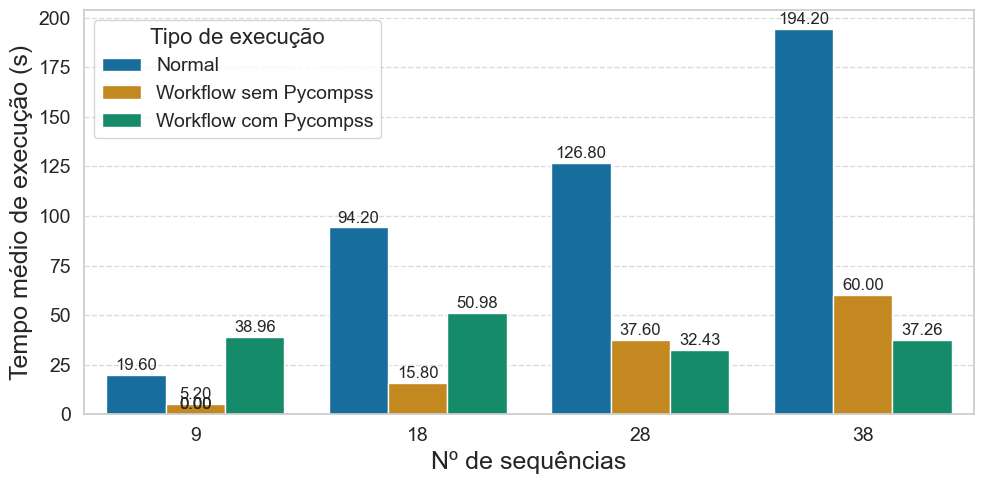

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
# Dados da tabela
data = {
    'Nº de sequências': [9, 18, 28, 38],
    'Normal': [19.60, 94.20, 126.80, 194.20],
    'Workflow sem Pycompss': [5.20, 15.80, 37.60, 60.00],
    'Workflow com Pycompss': [38.96, 50.98, 32.43, 37.26]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Converter para formato longo
df_melted = df.melt(id_vars='Nº de sequências', 
                    var_name='Tipo de execução', 
                    value_name='Tempo (s)')

# Configurar estilo seaborn e paleta de cores para artigos científicos
sns.set(style='whitegrid')  # estilo com grade horizontal clara
paleta = sns.color_palette("colorblind")  # paleta amigável para impressão e daltonismo

# Plotar gráfico de barras
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_melted, x='Nº de sequências', y='Tempo (s)', 
            hue='Tipo de execução', palette=paleta)
for p in ax.patches:
    altura = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # centro da barra
        y=altura + 1,                     # um pouco acima da barra
        s=f'{altura:.2f}',                # valor formatado com 2 casas decimais
        ha='center', va='bottom', fontsize=12
    )

# Ajustes visuais
plt.ylabel('Tempo médio de execução (s)', fontsize=18)
plt.xlabel('Nº de sequências', fontsize=18)
ax.tick_params(axis='y', labelsize=14) # Change labelsize to your desired value
ax.tick_params(axis='x', labelsize=14) # Change labelsize to your desired value
plt.legend(title='Tipo de execução', fontsize=14, title_fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # grade horizontal estilizada
plt.tight_layout()
#plt.show()
plt.savefig("desempenho_tipo.svg", dpi=300)


In [6]:
def comparar_versoes(v1, v2, nome1, nome2):
    resultados = []
    for i in range(len(df)):
        tempo1 = v1[i]
        tempo2 = v2[i]

        if tempo1 < tempo2:
            mais_rapido = nome1
            diff_perc = ((tempo2 - tempo1) / tempo2) * 100
        elif tempo2 < tempo1:
            mais_rapido = nome2
            diff_perc = ((tempo1 - tempo2) / tempo1) * 100
        else:
            mais_rapido = "Empate"
            diff_perc = 0.0

        resultados.append({
            'Nº de sequências': df.loc[i, 'Nº de sequências'],
            f'{nome1} (s)': tempo1,
            f'{nome2} (s)': tempo2,
            'Mais rápido': mais_rapido,
            'Vantagem percentual (%)': round(diff_perc, 2)
        })

    return pd.DataFrame(resultados)

def media_geometrica(v1, v2, nome1, nome2):
    produto = 1
    for i in range(len(df)):
        tempo1 = v1[i]
        tempo2 = v2[i]
        produto*=(tempo1/tempo2)
    return produto**(1/len(df))
# Comparações
comp1 = comparar_versoes(df['Normal'], df['Workflow sem Pycompss'], 'Normal', 'Workflow sem Pycompss')
comp2 = comparar_versoes(df['Normal'], df['Workflow com Pycompss'], 'Normal', 'Workflow com Pycompss')
comp3 = comparar_versoes(df['Workflow sem Pycompss'], df['Workflow com Pycompss'], 'Workflow sem Pycompss', 'Workflow com Pycompss')

# Mostrar resultados
print("Comparação: Normal vs Workflow sem Pycompss")
print(comp1.to_string(index=False))

print("\nComparação: Normal vs Workflow com Pycompss")
print(comp2.to_string(index=False))

print("\nComparação: Workflow sem Pycompss vs Workflow com Pycompss")
print(comp3.to_string(index=False))



# Mostrar resultados
print("Média geométrica: Normal vs Workflow sem Pycompss")
print(media_geometrica(df['Normal'], df['Workflow sem Pycompss'], 'Normal', 'Workflow sem Pycompss'))

print("\nMédia geométrica: Normal vs Workflow com Pycompss")
print(media_geometrica(df['Normal'], df['Workflow com Pycompss'], 'Normal', 'Workflow com Pycompss'))

print("\nMédia geométrica: Workflow sem Pycompss vs Workflow com Pycompss")
print(media_geometrica(df['Workflow sem Pycompss'], df['Workflow com Pycompss'], 'Workflow sem Pycompss', 'Workflow com Pycompss'))


Comparação: Normal vs Workflow sem Pycompss
 Nº de sequências  Normal (s)  Workflow sem Pycompss (s)           Mais rápido  Vantagem percentual (%)
                9        19.6                        5.2 Workflow sem Pycompss                    73.47
               18        94.2                       15.8 Workflow sem Pycompss                    83.23
               28       126.8                       37.6 Workflow sem Pycompss                    70.35
               38       194.2                       60.0 Workflow sem Pycompss                    69.10

Comparação: Normal vs Workflow com Pycompss
 Nº de sequências  Normal (s)  Workflow com Pycompss (s)           Mais rápido  Vantagem percentual (%)
                9        19.6                      38.96                Normal                    49.69
               18        94.2                      50.98 Workflow com Pycompss                    45.88
               28       126.8                      32.43 Workflow com Pycompss 